## Define Imports and Determine Device

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ## Define Imports and Determine Device
import os, sys
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
os.sys.path.insert(0, ".")
from DiabetesData import DiabeticData
from Autoencoder import ConvAutoencoder
from ConvVarAutoencoder import ConvVAE
from DogCatData import DogCatData

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
datatype="diabetes"
batch_size=16
epochs = 1

normalize=False
size=100

cuda


# read in data

In [28]:
if datatype == "diabetes":
    filename = "data/trainLabels_ad.csv"
    root_dir = "data/diabetes"
    task = ([0],[4])
    # task = ([0,1,2], [3,4])
    # task = ([0,1,2], (3,4))

    data = pd.read_csv(filename)
    # data = data.sample(frac=0.25)
    train, test = train_test_split(data, test_size=0.1)
    train, val = train_test_split(train, test_size=0.1)

    train = train[train["level"] == 0]
    print(train)
    classes = ['none', 'severe']
    #filter out 1s from training set

    train = train.reset_index()
    test = test.reset_index()
    val = val.reset_index()

    data = {'train': DiabeticData(df = train, transform_key="train", root_dir=root_dir, task = task, normalize = normalize),
            'valid': DiabeticData(df = val, transform_key="valid", root_dir=root_dir, task = task, normalize = normalize),
            'test': DiabeticData(df = test, transform_key="test", root_dir=root_dir, task = task, normalize = normalize)
            }


elif datatype == "dogcat":
    filename = "data/dogcat_ad.csv"
    root_dir = "data/dogcat/train"
    classes = ['cat', 'dog']
    # task = ([0,1,2], (3,4))

    data = pd.read_csv(filename)
    # data = data.sample(frac=0.25)
    train, test = train_test_split(data, test_size=0.1)
    train, val = train_test_split(train, test_size=0.1)

    train = train[train["label"] == 1]
    print(train)
    #filter out 1s from training set

    train = train.reset_index()
    test = test.reset_index()
    val = val.reset_index()

    data = {'train': DogCatData(df = train, transform_key="train", root_dir=root_dir, normalize = normalize),
            'valid': DogCatData(df = val, transform_key="valid", root_dir=root_dir, normalize = normalize),
            'test': DogCatData(df = test, transform_key="test", root_dir=root_dir, normalize = normalize)
            }




dataloaders = {
        'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
        'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=True),
        'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True)
} 

print(train.shape)
print(val.shape)
print(test.shape)


                  image  level
7680     9668_left.jpeg      0
26698   33791_left.jpeg      0
27509  34828_right.jpeg      0
15776   19778_left.jpeg      0
4410     5541_left.jpeg      0
...                 ...    ...
31457  39717_right.jpeg      0
17796   22424_left.jpeg      1
30320   38346_left.jpeg      0
12921  16234_right.jpeg      0
32452   40961_left.jpeg      0

[5706 rows x 2 columns]
      index             image  level
0      7680    9668_left.jpeg      0
1     26698   33791_left.jpeg      0
2     27509  34828_right.jpeg      0
3     15776   19778_left.jpeg      0
4      4410    5541_left.jpeg      0
...     ...               ...    ...
5701  31457  39717_right.jpeg      0
5702  17796   22424_left.jpeg      1
5703  30320   38346_left.jpeg      0
5704  12921  16234_right.jpeg      0
5705  32452   40961_left.jpeg      0

[5706 rows x 3 columns]
task = ([0, 1], [2, 3, 4])
     index             image  level
0     6169   7776_right.jpeg      0
1    26055  32978_right.jpeg      0

In [5]:
model = ConvAutoencoder()
print(model)

model.fit(5, dataloaders["train"])


  0%|          | 0/360 [00:00<?, ?it/s]

ConvAutoencoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
  (criterion): MSELoss()
)
in fit function
1


  0%|          | 0/360 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 1.617346
2


  0%|          | 0/360 [00:00<?, ?it/s]

Epoch: 2 	Training Loss: 0.889019
3


  0%|          | 0/360 [00:00<?, ?it/s]

Epoch: 3 	Training Loss: 0.863070
4


  0%|          | 0/360 [00:00<?, ?it/s]

Epoch: 4 	Training Loss: 0.853790
5


100%|██████████| 360/360 [02:31<00:00,  2.38it/s]

Epoch: 5 	Training Loss: 0.849284


In [ ]:
# model = ConvVAE(1000, device)
model = ConvAutoencoder(device)
print(model)

model.fit(epochs, dataloaders["train"])

/home/tntech.edu/kebrown46/miniconda3/envs/xai/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

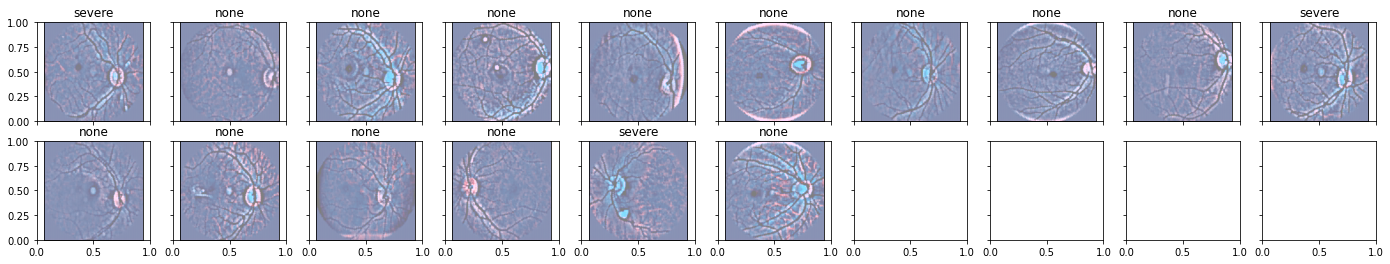

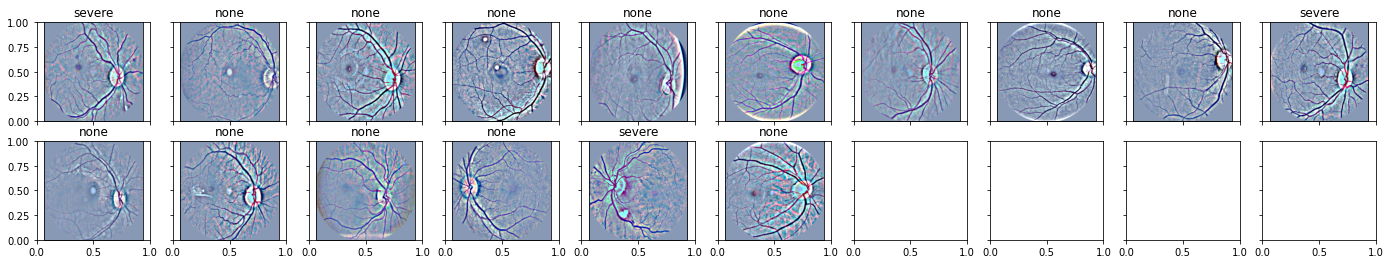

In [17]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))


# obtain one batch of test images
dataiter = iter(dataloaders["test"])
images, labels = dataiter.next()

# get sample outputs
output = model(images.to(device))
# output = F.softmax(output)
# prep images for display
images = images.numpy()


# output is resized into a batch of iages
output = output.view(batch_size, 3, size, size)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# # plot the first ten input images and then reconstructed images
# fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))

# # input images on top row, reconstructions on bottom
# for images, row in zip([images, output], axes):
#     for img, ax in zip(images, row):
#         ax.imshow(np.squeeze(img))
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    ax.set_title(classes[labels[idx]])
plt.savefig("autoencoded.png")    


# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
plt.savefig("original.png")    


Now, we loop through the training set and calculate reconstruction loss 

In [35]:
dataloaders['test'] = DataLoader(data['test'], batch_size=1, shuffle=True)

results = []
results_cols = ["Image Label", "Reconstruction Loss"]
for x, y in dataloaders['test']:
    X = x.to(device)
    output = model(X)
    output = output.cpu().detach().numpy()
    for i in range(y.shape[0]):
        ls = 0
        image = x[i].numpy()
        ouptut = output[i]
        label = y[i].numpy()
        ls = np.sum(np.square(image.ravel() - output.ravel()))
        # ls = model.criterion(output, image)
        results.append([label, ls])

results = pd.DataFrame(results, columns=results_cols)
results.to_csv("reconstruction_error.csv")


#find error threshold on validation set



#evaluate on testing data

,Image Label,Reconstruction Loss
0,0,3484.041016
1,0,10791.950195
2,0,7117.177734
3,0,8506.458984
4,0,19248.966797
...,...,...
874,0,6276.445801
875,0,5446.117676
876,1,6379.023926
877,0,1570.047607


In [42]:
print(results)
label_1 = results[results["Image Label"] == 1]
label_0 = results[results["Image Label"] == 0]
print(label_0)
print(label_1)
avg_1 = np.mean(label_1['Reconstruction Loss'].values)
avg_0 = np.mean(label_0['Reconstruction Loss'].values)

print("Average Reconstruction Error (Prediction = 0)", avg_0)
print("Average Reconstruction Error (Prediction = 1)", avg_1)

plt.hist(label_1['Reconstruction Loss'].values, density=False, bins=30, color='blue')
plt.hist(label_0['Reconstruction Loss'].values, density=False, bins=30, color='yellow')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.savefig('errordist.png')

Average Reconstruction Error (Prediction = 0) 3948.9047650520515
Average Reconstruction Error (Prediction = 1) 3984.6855279199826
